Please do the following in a jupyter notebook

There is a csv under the data folder called hw3.csv
the goal of this hw is to calculate volumeUSD by chain
Some hints for this hw:

volumeUSD = volume * close
you will need to clean data
visualize your data to better understand what is going on

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from functools import reduce
import math

%matplotlib inline

In [2]:
market_caps = pd.read_csv('hw3.csv')
df = market_caps

In [3]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [4]:
df.loc[df['token'].str.contains('<span\sname=\"tokenName\">'), 'token'] = df.loc[df['token'].str.contains('<span\sname=\"tokenName\">'), 'token'].str.extract('<span\sname=\"tokenName\">(.|\n)*?<\/span>')

In [5]:
df.sort_values(['token','ts'], inplace=True)
df.set_index('ts',inplace = True)

In [6]:
np.isnan(df['open']).any()

False

In [7]:
np.isnan(df['close']).any()

True

In [8]:
df['close'].fillna(df['open'],inplace=True)

In [9]:
np.isnan(df['close']).any()

False

In [10]:
np.isnan(df['volume']).any()

False

In [11]:
df.loc[df.open / df.close >= 2, 'close'] = df.loc[df.open / df.close >= 2, 'open']

In [22]:
df.loc[df.close >= df['close'].mean(), 'close'] = df.loc[df.close >= df['close'].mean(), 'open']

In [32]:
df['close'].mean()

7133.678534233221

In [23]:
df['volumeUSD'] = df['close'] * df['volume']

<AxesSubplot:xlabel='ts'>

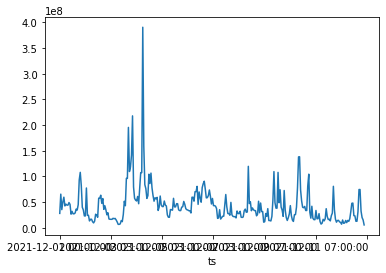

In [24]:
df['volumeUSD'].loc[df['token']=='ETH'].plot()

<AxesSubplot:xlabel='ts'>

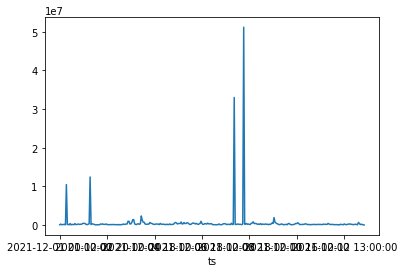

In [25]:
df['volumeUSD'].loc[df['token']=='COMP'].plot()

<AxesSubplot:xlabel='ts'>

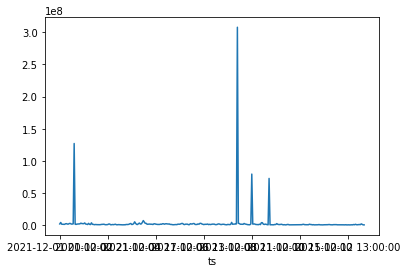

In [26]:
df['volumeUSD'].loc[df['token']=='CRV'].plot()

<AxesSubplot:xlabel='ts'>

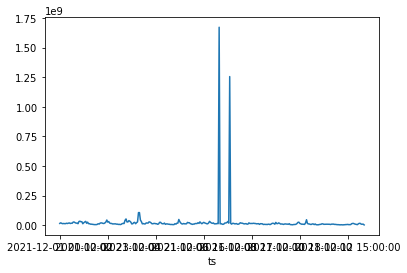

In [27]:
df['volumeUSD'].loc[df['token']=='SOL'].plot()

<AxesSubplot:xlabel='ts'>

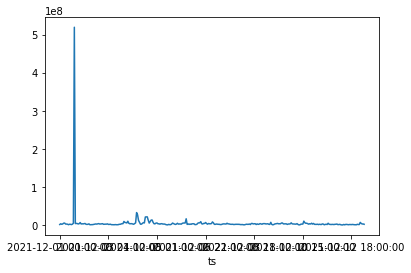

In [28]:
df['volumeUSD'].loc[df['token']=='USDT'].plot()

<AxesSubplot:xlabel='ts'>

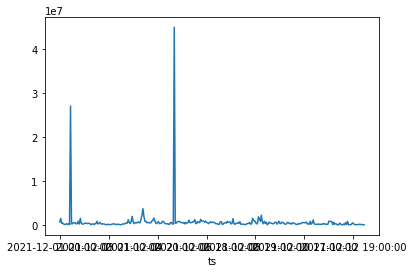

In [29]:
df['volumeUSD'].loc[df['token']=='AAVE'].plot()

<AxesSubplot:xlabel='ts'>

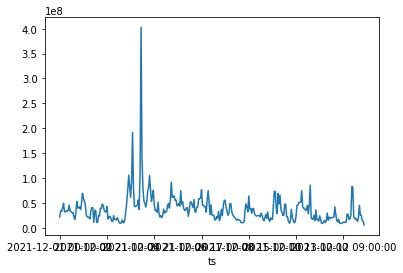

In [30]:
df['volumeUSD'].loc[df['token']=='BTC'].plot()

<AxesSubplot:xlabel='ts'>

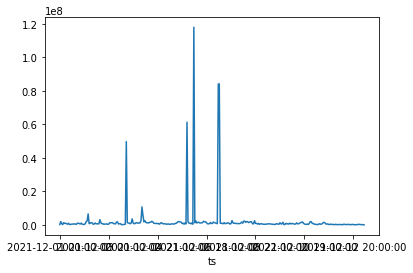

In [31]:
df['volumeUSD'].loc[df['token']=='UNI'].plot()